# Linear Regression

Linear regression is a technique that measures the relationship between two variables. If we have an independent variable $X$, and a dependent outcome variable $Y$, linear regression allows us to determine which linear model $Y = \alpha + \beta X$ best explains the data. 

## Equation : *Y=wX+b*
## Cost Function: 
\begin{equation*}
  Cost = \frac{\sum_{k=1}^n \left( Y_p - Y_e \right)^2}{2 * number\_of\_samples } 
\end{equation*}
\begin{align}
 where: \
\ Y_p = predicted\ output \
\ Y_e = expected\ output
\end{align}




In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

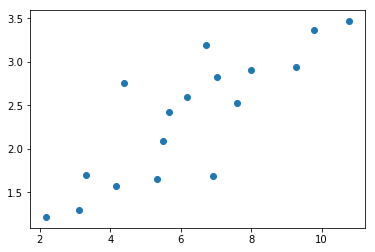

In [3]:
plt.scatter(train_X,train_Y)

In [4]:
# tf.placeholders for the input and output of the network. Placeholders are
# variables which we need to fill in when we are ready to compute the graph.
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [5]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

### Equation : *pred = wX + b* :

In [6]:
pred = tf.add(tf.mul(X, W), b)

\begin{equation*}
  Cost = \frac{\sum_{k=1}^n \left( pred - Y \right)^2}{2 * n\_samples } 
\end{equation*}

In [7]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

In [9]:
# %% Use gradient descent to optimize W,b

learning_rate = 0.01

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [10]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.079078563 W= [ 0.2753447] b= [ 0.61621505]
Epoch: 0100 cost= 0.078835487 W= [ 0.27381328] b= [ 0.62723148]
Epoch: 0150 cost= 0.078620605 W= [ 0.27237293] b= [ 0.63759291]
Epoch: 0200 cost= 0.078430593 W= [ 0.27101827] b= [ 0.64733869]
Epoch: 0250 cost= 0.078262679 W= [ 0.26974425] b= [ 0.65650386]
Epoch: 0300 cost= 0.078114204 W= [ 0.26854593] b= [ 0.66512483]
Epoch: 0350 cost= 0.077982955 W= [ 0.2674188] b= [ 0.67323327]
Epoch: 0400 cost= 0.077866964 W= [ 0.26635864] b= [ 0.6808601]
Epoch: 0450 cost= 0.077764437 W= [ 0.26536143] b= [ 0.6880334]
Epoch: 0500 cost= 0.077673845 W= [ 0.26442367] b= [ 0.69477963]
Epoch: 0550 cost= 0.077593751 W= [ 0.26354167] b= [ 0.70112562]
Epoch: 0600 cost= 0.077522978 W= [ 0.262712] b= [ 0.70709389]
Epoch: 0650 cost= 0.077460468 W= [ 0.26193175] b= [ 0.71270651]
Epoch: 0700 cost= 0.077405214 W= [ 0.26119801] b= [ 0.71798551]
Epoch: 0750 cost= 0.077356428 W= [ 0.2605077] b= [ 0.72295088]
Epoch: 0800 cost= 0.077313319 W= [ 0.25985855] 

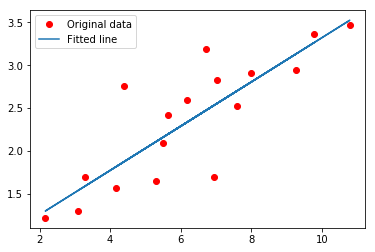

In [12]:
# %% We create a session to use the graph
n_epochs = 1000
display_step=50
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(n_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()